**MNIST = Modified National Institute of Standards and Technology**

It’s a dataset of 28x28 grayscale images of handwritten digits (0–9)

Each image is labeled with the correct digit

📦 Dataset size:

60,000 training images

10,000 test images

Loading Dataset


In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()

# View dataset structure
print(digits.keys())  # ['data', 'target', 'images', 'DESCR']


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


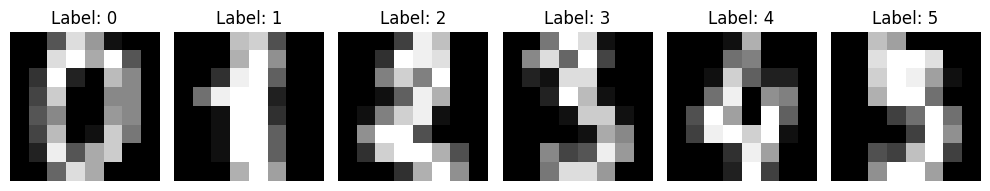

In [2]:
# Show first 6 images with their labels
fig, axes = plt.subplots(1, 6, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [3]:
print("Image data shape:", digits.images.shape)   # (1797, 8, 8)
print("Feature matrix shape:", digits.data.shape) # (1797, 64)
print("Target shape:", digits.target.shape)       # (1797,)


Image data shape: (1797, 8, 8)
Feature matrix shape: (1797, 64)
Target shape: (1797,)


Preprocessing


In [4]:
from sklearn.model_selection import train_test_split

X = digits.data        # (1797, 64) - flattened images
y = digits.target      # (1797,)    - digit labels (0-9)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1437, 64)
Test size: (360, 64)


Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Only transform test data


Model Training


In [7]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Train the model
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
y_pred = model.predict(X_test_scaled)


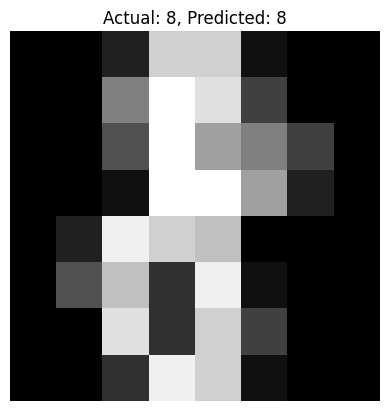

In [10]:
import matplotlib.pyplot as plt

# Pick a random test image
index = 2
plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
plt.title(f"Actual: {y_test[index]}, Predicted: {model.predict([X_test_scaled[index]])[0]}")
plt.axis('off')
plt.show()


Accuracy


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")


Accuracy on Test Set: 0.9722


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



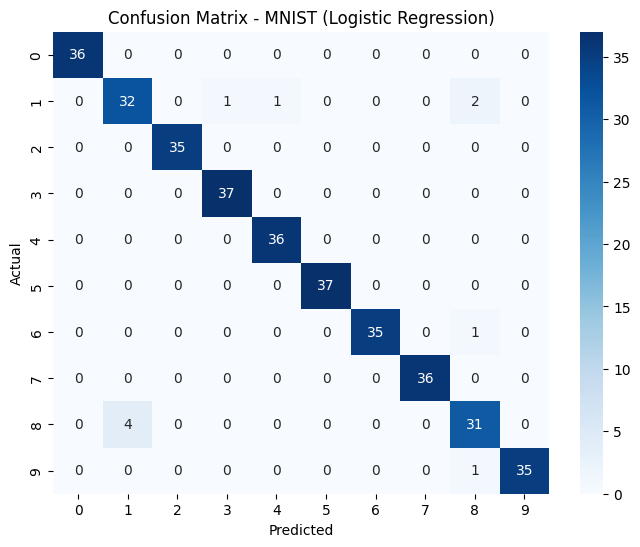

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MNIST (Logistic Regression)")
plt.show()
